In [1]:
import struct
import numpy as np
import pandas as pd
from array import array
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import random
import time

from skimage import feature as ft
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

a:\python3.6\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#标签读取
def read_MNIST_lable(location):
    with open(location, "rb") as f:
        magic, size = struct.unpack(">II", f.read(8))
        labels = array("B", f.read())
        labels = np.array(labels,dtype='int32')
    return magic, size, labels

#图片读取
def read_MNIST_Pics(location):
    with open(location, "rb") as f:
        magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
        image_data = array("B", f.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]
        shape = (rows,cols)
        image_frame = pd.DataFrame(images,columns=['Pixel'+str(i) for i in range(784)])
    return magic,shape,image_frame

#图片显示            
def show_MNIST_pics(image_df,shape,num):
    for i in range(num):
        plt.subplot(4,num/4+1,i+1)
        img = np.array(image_df.loc[i,:],dtype='int32')
        img = img.reshape(shape[0],shape[1])
        img = Image.fromarray(img)
        plt.imshow(img, cmap='gray')
        plt.axis("off")

In [4]:
magic,size,labels = read_MNIST_lable('Y:/Kaggle/感知机/train-labels.idx1-ubyte')

In [5]:
magic1,shape,image_frame = read_MNIST_Pics('Y:/Kaggle/感知机/train-images.idx3-ubyte')

In [6]:
image_frame.head()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


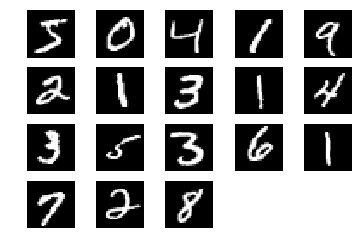

In [7]:
num = 18
show_MNIST_pics(image_frame.loc[np.arange(num),:],shape,num)

In [8]:
# 抽取HOG特征并转成dataframe
image_value = image_frame.get_values()
features = []
for i in range(60000):
    features.append(ft.hog(image_value[i].reshape(28,28),  # input image
                  orientations=9,  # number of bins
                  pixels_per_cell=(7,7), # pixel per cell
                  cells_per_block=(2,2), # cells per blcok
                  block_norm = 'L2-Hys', #  block norm : str {‘L1’, ‘L1-sqrt’, ‘L2’, ‘L2-Hys’}
                  transform_sqrt = True, # power law compression (also known as gamma correction)
                  feature_vector=True, # flatten the final vectors
                  visualise=False)) # return HOG map
data_frame = pd.DataFrame(features,columns=['Fture_'+str(i) for i in range(324)])

In [9]:
data_frame.head()

,Fture_0,Fture_1,Fture_2,Fture_3,Fture_4,Fture_5,Fture_6,Fture_7,Fture_8,Fture_9,...,Fture_314,Fture_315,Fture_316,Fture_317,Fture_318,Fture_319,Fture_320,Fture_321,Fture_322,Fture_323
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.041826,0.0,0.0,0.0,0.0,0.0,...,0.084542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.059855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
#转换类别 ，大于5的设为1
Labels_trans = np.where(labels!=0,1,0)

In [70]:
#拆分训练集，验证集
train_features, test_features, train_labels, test_labels = train_test_split(data_frame, 
                                                                            Labels_trans, 
                                                                            test_size=0.33,
                                                                            random_state=0)

In [71]:
train_features.head()

,Fture_0,Fture_1,Fture_2,Fture_3,Fture_4,Fture_5,Fture_6,Fture_7,Fture_8,Fture_9,...,Fture_314,Fture_315,Fture_316,Fture_317,Fture_318,Fture_319,Fture_320,Fture_321,Fture_322,Fture_323
39013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
def Train(train_features,train_labels):
    train_features['label'] = train_labels
    # 获取参数
    trainset_size = len(train_labels)
    feature_length = train_features.shape[1] -1

    # 初始化 w,b
    w = np.zeros((feature_length,1))
    b = 0

    study_count = 0                         # 学习次数记录，只有当分类错误时才会增加
    nochange_count = 0                      # 统计连续分类正确数，当分类错误时归为0
    nochange_upper_limit = 20000           # 连续分类正确上界，当连续分类超过上界时，认为已训练好，退出训练

    while True:
        nochange_count += 1
        if nochange_count > nochange_upper_limit:
            break

        # 随机选的数据
        index = list(train_features.index)[random.randint(0, trainset_size-1)]
                
        feature = train_features.loc[index,'Fture_0':'Fture_323']
        label = train_features.loc[index,'label']

        # 计算yi(w*xi+b)
        yi = int(label != 0) * 2 - 1                       # 如果等于object_num, yi= 1, 否则yi=1
        result = yi * (np.dot(feature,w) + b)

        # 如果yi(w*xi+b) <= 0 则更新 w 与 b 的值
        if result <= 0:
            img = np.reshape(feature,(feature_length,1))    # 为了维数统一，需重新设定一下维度

            w += img*yi*study_step                          # 按算法步骤3更新参数
            b += yi*study_step

            study_count += 1
            if study_count > study_total:
                break
            nochange_count = 0
            print("训练完成度：",study_count/study_total*100)

    return w,b

def Predict(testset,w,b):
    predict = []
    for img in testset.index:
        result = np.dot(testset.loc[img,:],w) + b
        result = result > 0

        predict.append(result)

    return np.array(predict,dtype='int32')

In [77]:
#模型训练
study_step = 0.0001                                 # 学习率
study_total = 2000                               # 学习次数
w,b = Train(train_features,train_labels)

a:\python3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
a:\python3.6\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


训练完成度： 0.05
训练完成度： 0.1
训练完成度： 0.15
训练完成度： 0.2
训练完成度： 0.25
训练完成度： 0.3
训练完成度： 0.35000000000000003
训练完成度： 0.4
训练完成度： 0.44999999999999996
训练完成度： 0.5
训练完成度： 0.5499999999999999
训练完成度： 0.6
训练完成度： 0.65
训练完成度： 0.7000000000000001
训练完成度： 0.75
训练完成度： 0.8
训练完成度： 0.8500000000000001
训练完成度： 0.8999999999999999
训练完成度： 0.95
训练完成度： 1.0
训练完成度： 1.05
训练完成度： 1.0999999999999999
训练完成度： 1.15
训练完成度： 1.2
训练完成度： 1.25
训练完成度： 1.3
训练完成度： 1.35
训练完成度： 1.4000000000000001
训练完成度： 1.4500000000000002
训练完成度： 1.5
训练完成度： 1.55
训练完成度： 1.6
训练完成度： 1.6500000000000001
训练完成度： 1.7000000000000002
训练完成度： 1.7500000000000002
训练完成度： 1.7999999999999998
训练完成度： 1.8499999999999999
训练完成度： 1.9
训练完成度： 1.95
训练完成度： 2.0
训练完成度： 2.0500000000000003
训练完成度： 2.1
训练完成度： 2.15
训练完成度： 2.1999999999999997
训练完成度： 2.25
训练完成度： 2.3
训练完成度： 2.35
训练完成度： 2.4
训练完成度： 2.45
训练完成度： 2.5
训练完成度： 2.55
训练完成度： 2.6
训练完成度： 2.65
训练完成度： 2.7
训练完成度： 2.75
训练完成度： 2.8000000000000003
训练完成度： 2.85
训练完成度： 2.9000000000000004
训练完成度： 2.9499999999999997
训练完成度： 3.0
训练完成度： 3.05
训练完成度： 3.1
训练完成度： 3.1

训练完成度： 26.450000000000003
训练完成度： 26.5
训练完成度： 26.55
训练完成度： 26.6
训练完成度： 26.650000000000002
训练完成度： 26.700000000000003
训练完成度： 26.75
训练完成度： 26.8
训练完成度： 26.85
训练完成度： 26.900000000000002
训练完成度： 26.950000000000003
训练完成度： 27.0
训练完成度： 27.05
训练完成度： 27.1
训练完成度： 27.150000000000002
训练完成度： 27.200000000000003
训练完成度： 27.250000000000004
训练完成度： 27.3
训练完成度： 27.35
训练完成度： 27.400000000000002
训练完成度： 27.450000000000003
训练完成度： 27.500000000000004
训练完成度： 27.55
训练完成度： 27.6
训练完成度： 27.650000000000002
训练完成度： 27.700000000000003
训练完成度： 27.750000000000004
训练完成度： 27.800000000000004
训练完成度： 27.85
训练完成度： 27.900000000000002
训练完成度： 27.950000000000003
训练完成度： 28.000000000000004
训练完成度： 28.050000000000004
训练完成度： 28.1
训练完成度： 28.15
训练完成度： 28.199999999999996
训练完成度： 28.249999999999996
训练完成度： 28.299999999999997
训练完成度： 28.349999999999998
训练完成度： 28.4
训练完成度： 28.449999999999996
训练完成度： 28.499999999999996
训练完成度： 28.549999999999997
训练完成度： 28.599999999999998
训练完成度： 28.65
训练完成度： 28.7
训练完成度： 28.749999999999996
训练完成度： 28.799999999999997
训练完成度： 28

训练完成度： 52.300000000000004
训练完成度： 52.349999999999994
训练完成度： 52.400000000000006
训练完成度： 52.449999999999996
训练完成度： 52.5
训练完成度： 52.55
训练完成度： 52.6
训练完成度： 52.65
训练完成度： 52.7
训练完成度： 52.75
训练完成度： 52.800000000000004
训练完成度： 52.849999999999994
训练完成度： 52.900000000000006
训练完成度： 52.949999999999996
训练完成度： 53.0
训练完成度： 53.05
训练完成度： 53.1
训练完成度： 53.15
训练完成度： 53.2
训练完成度： 53.25
训练完成度： 53.300000000000004
训练完成度： 53.349999999999994
训练完成度： 53.400000000000006
训练完成度： 53.449999999999996
训练完成度： 53.5
训练完成度： 53.55
训练完成度： 53.6
训练完成度： 53.65
训练完成度： 53.7
训练完成度： 53.75
训练完成度： 53.800000000000004
训练完成度： 53.849999999999994
训练完成度： 53.900000000000006
训练完成度： 53.949999999999996
训练完成度： 54.0
训练完成度： 54.05
训练完成度： 54.1
训练完成度： 54.15
训练完成度： 54.2
训练完成度： 54.25
训练完成度： 54.300000000000004
训练完成度： 54.35
训练完成度： 54.400000000000006
训练完成度： 54.449999999999996
训练完成度： 54.50000000000001
训练完成度： 54.55
训练完成度： 54.6
训练完成度： 54.65
训练完成度： 54.7
训练完成度： 54.75
训练完成度： 54.800000000000004
训练完成度： 54.85
训练完成度： 54.900000000000006
训练完成度： 54.949999999999996
训练完成度： 55.0000

训练完成度： 77.64999999999999
训练完成度： 77.7
训练完成度： 77.75
训练完成度： 77.8
训练完成度： 77.85
训练完成度： 77.9
训练完成度： 77.95
训练完成度： 78.0
训练完成度： 78.05
训练完成度： 78.10000000000001
训练完成度： 78.14999999999999
训练完成度： 78.2
训练完成度： 78.25
训练完成度： 78.3
训练完成度： 78.35
训练完成度： 78.4
训练完成度： 78.45
训练完成度： 78.5
训练完成度： 78.55
训练完成度： 78.60000000000001
训练完成度： 78.64999999999999
训练完成度： 78.7
训练完成度： 78.75
训练完成度： 78.8
训练完成度： 78.85
训练完成度： 78.9
训练完成度： 78.95
训练完成度： 79.0
训练完成度： 79.05
训练完成度： 79.10000000000001
训练完成度： 79.14999999999999
训练完成度： 79.2
训练完成度： 79.25
训练完成度： 79.3
训练完成度： 79.35
训练完成度： 79.4
训练完成度： 79.45
训练完成度： 79.5
训练完成度： 79.55
训练完成度： 79.60000000000001
训练完成度： 79.65
训练完成度： 79.7
训练完成度： 79.75
训练完成度： 79.80000000000001
训练完成度： 79.85
训练完成度： 79.9
训练完成度： 79.95
训练完成度： 80.0
训练完成度： 80.05
训练完成度： 80.10000000000001
训练完成度： 80.15
训练完成度： 80.2
训练完成度： 80.25
训练完成度： 80.30000000000001
训练完成度： 80.35
训练完成度： 80.4
训练完成度： 80.45
训练完成度： 80.5
训练完成度： 80.55
训练完成度： 80.60000000000001
训练完成度： 80.65
训练完成度： 80.7
训练完成度： 80.75
训练完成度： 80.80000000000001
训练完成度： 80.85
训练完成度： 80.9
训练完成度： 80.

In [78]:
#预测检验
test_predict = Predict(test_features,w,b)
score = accuracy_score(test_labels,test_predict)
score

0.9813636363636363